# Linear Regression

## 1. Using Normal Equation

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

Let's generate an X vector with 100 rows and 1 column that have as values
random numbers between 0 and 1, multiplied by 2. And a Y vector dependant on X plus some noise.

In [6]:
X = 2*np.random.rand(100,1)

In [7]:
y = 4+3*X+np.random.rand(100,1)

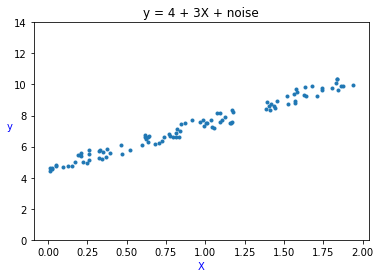

In [27]:
plt.scatter(X,y, marker='.')
plt.title('y = 4 + 3X + noise')
plt.ylim(ymin=0, ymax = 14)
plt.xlabel('X', color = 'b')
plt.ylabel('y', rotation=0, color = 'b')
plt.show()

In [16]:
X_b = np.c_[np.ones((100,1)),X] ## add X0 =1 to each instance

In [17]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [28]:
theta_best

array([[4.5421269 ],
       [2.94541833]])

### Predict on new cases

In [20]:
X_new = np.array([[0],[2]])
print(X_new)

[[0]
 [2]]


In [21]:
X_new.shape

(2, 1)

In [22]:
X_new_b = np.c_[np.ones((2,1)), X_new] # add x0 = 1 to each instance

In [24]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.5421269 ],
       [10.43296356]])

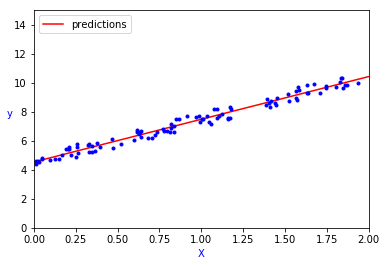

In [26]:
plt.plot(X_new, y_predict, "r-", label='predictions')
plt.legend(loc='upper left')
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.xlabel('X', color='b')
plt.ylabel('y', rotation=0, color='b')
plt.show()

### Using SkitLearn: sklearn.linear_model import LinearRegression

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lin_reg = LinearRegression()

In [31]:
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
lin_reg.intercept_, lin_reg.coef_

(array([4.5421269]), array([[2.94541833]]))

In [33]:
lin_reg.predict(X_new)

array([[ 4.5421269 ],
       [10.43296356]])

## 2. Using Batch Gradien Descent

** eta = 0.1 **

In [112]:
eta = 0.1 #learning rate

In [113]:
n_iterations = 1000

In [114]:
m = 100

In [115]:
theta = np.random.randn(2,1) #random initialization
theta

array([[-1.25543044],
       [ 0.68156459]])

** Building Graphics using Batch Gradient Descent**

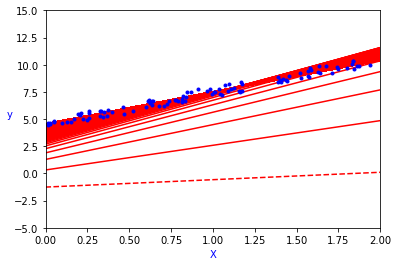

In [116]:
#generating the first graphic
plt.plot(X_new, X_new_b.dot(theta), 'r', linestyle='dashed')
for iteration in range(n_iterations):
    # iterating over all data 1000 times
    gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y) 
    theta = theta - eta*gradients
    #1000 lines generated (all the iterations)
    plt.plot(X_new, X_new_b.dot(theta), "r-")
# plt.legend(loc='upper left')
plt.plot(X,y,'b.')
plt.axis([0,2,-5,15])
plt.xlabel('X', color='b')
plt.ylabel('y', rotation=0, color='b')
plt.title('eta or learning rate = 0.1')
plt.show()

In [119]:
theta

array([[4.5421269 ],
       [2.94541833]])

** eta = 0.02 **

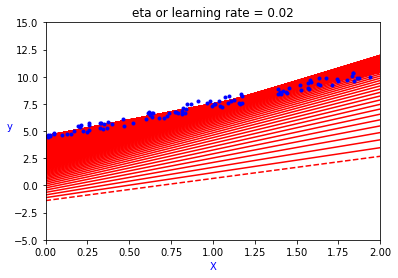

In [122]:
eta = 0.02 #learning rate

n_iterations = 1000

m = 100

theta = np.random.randn(2,1) #random initialization

"""** Building Graphics using Batch Gradient Descent**"""

#generating the first graphic
plt.plot(X_new, X_new_b.dot(theta), 'r', linestyle='dashed')
for iteration in range(n_iterations):
    # iterating over all data 1000 times
    gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y) 
    theta = theta - eta*gradients
    #1000 lines generated (all the iterations)
    plt.plot(X_new, X_new_b.dot(theta), "r-")
# plt.legend(loc='upper left')
plt.plot(X,y,'b.')
plt.axis([0,2,-5,15])
plt.xlabel('X', color='b')
plt.ylabel('y', rotation=0, color='b')
plt.title('eta or learning rate = 0.02')
plt.show()

** eta = 0.5 **

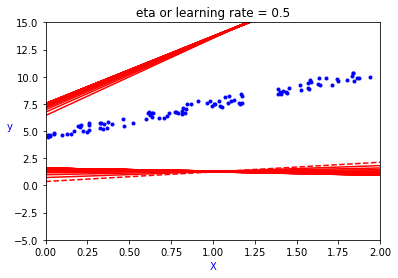

In [130]:
eta = 0.5 #learning rate

n_iterations = 100

m = 100

theta = np.random.randn(2,1) #random initialization

"""** Building Graphics using Batch Gradient Descent**"""

#generating the first graphic
plt.plot(X_new, X_new_b.dot(theta), 'r', linestyle='dashed')
for iteration in range(n_iterations):
    # iterating over all data 1000 times
    gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y) 
    theta = theta - eta*gradients
    #1000 lines generated (all the iterations)
    plt.plot(X_new, X_new_b.dot(theta), "r-")
# plt.legend(loc='upper left')
plt.plot(X,y,'b.')
plt.axis([0,2,-5,15])
plt.xlabel('X', color='b')
plt.ylabel('y', rotation=0, color='b')
plt.title('eta or learning rate = 0.5')
plt.show()

## 3. Using Stochastic Gradient Descent

In [138]:
n_ephocs = 50

In [139]:
t0, t1 = 5,50 #learning schedule hyperparameters

In [140]:
def learning_schedule(t):
    return t0/(t + t1)

In [141]:
theta = np.random.randn(2,1) #random initialization
theta

array([[-0.18860571],
       [-0.76617187]])

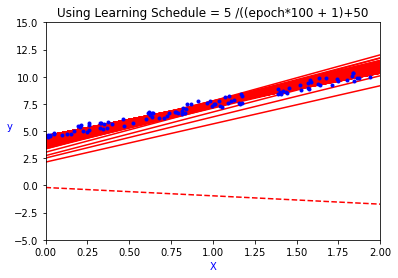

In [142]:
#generating the first graphic
plt.plot(X_new, X_new_b.dot(theta), 'r', linestyle='dashed')
# 50 times
for epoch in range(n_ephocs):
    # In each of the 100 lines in the dataset calculate theta
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m +i)
        # we get a theta using each of the 100 records
        theta = theta - eta*gradients
        # plotting each of the 50*100 lines
        plt.plot(X_new, X_new_b.dot(theta), "r-")
# plt.legend(loc='upper left')
plt.plot(X,y,'b.')
plt.axis([0,2,-5,15])
plt.xlabel('X', color='b')
plt.ylabel('y', rotation=0, color='b')
plt.title('Using Learning Schedule = 5 /((epoch*100 + 1)+50')
plt.show()

In [143]:
theta

array([[4.53853367],
       [2.9550169 ]])

### Using Skit Learn: sklearn.linear_model import SGDRegressor

In [54]:
from sklearn.linear_model import SGDRegressor

In [55]:
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)

In [56]:
sgd_reg.fit(X,y.ravel()) #.ravel() returns a contiguous flattened array.

/Users/marleneprado/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=50, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [57]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.53868209]), array([2.94017516]))